In [1]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_random_images(directories, num_images):
    all_image_paths = []

    for directory in directories:
        for root, _, files in os.walk(directory):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    all_image_paths.append(os.path.join(root, file))

    if num_images > len(all_image_paths):
        print(f"Requested {num_images} images, but only found {len(all_image_paths)} images.")
        num_images = len(all_image_paths)

    selected_image_paths = random.sample(all_image_paths, num_images)

    loaded_images = []
    for image_path in selected_image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            loaded_images.append((image_path, image))
        else:
            print(f"Warning: Failed to load image {image_path}")

    return loaded_images

In [3]:
# directories = ["training/wildcrazy/1", "training/wildcrazy/2", "training/wildcrazy/3", "training/wildcrazy/4", "training/wildcrazy/5", "training/wildcrazy/6", "training/wildcrazy/7"]
directories = ["training/wildcrazy/2"]

num_images = 10

images = load_random_images(directories, num_images)

for img_path, img in images:
    print(f"Loaded {img_path} with shape {img.shape}")

Loaded training/wildcrazy/2/85_12.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/[n_7.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/kh_5.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/ws_2.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/{T_8.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/#Y_14.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/4-_8.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/--_13.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/PR_11.png with shape (96, 192, 3)
Loaded training/wildcrazy/2/o[_21.png with shape (96, 192, 3)


In [4]:
def plot_images(images, grid_shape=(2, 5)):
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(15, 6))
    fig.suptitle('Images to Preprocess', fontsize=16)

    for ax, (img_path, img) in zip(axes.flat, images):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')  # Convert BGR to RGB
        ax.set_title(os.path.basename(img_path))
        ax.axis('off')

    for ax in axes.flat[len(images):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

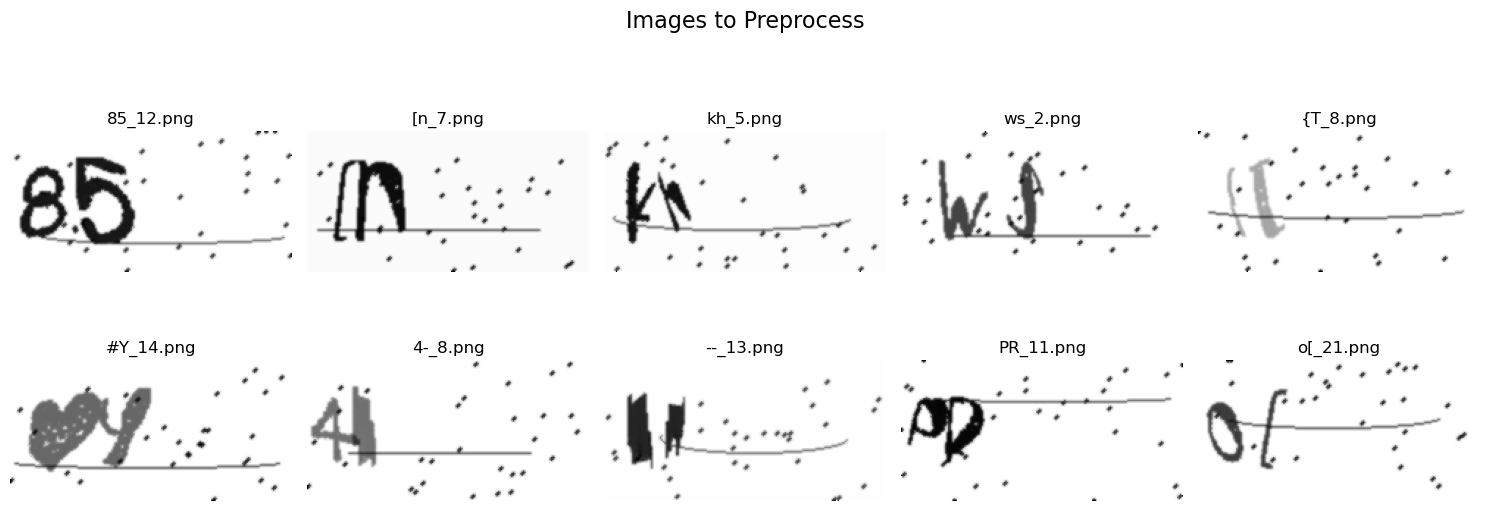

In [5]:
plot_images(images, grid_shape=(2, 5))

In [6]:
# def preprocess_image(image):
    
#     #make image gray 
#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#     gray = clahe.apply(gray)
    
#     #Blur
#     blur = cv2.GaussianBlur(gray,(5,5),0)
#     bilateral = cv2.bilateralFilter(gray,5,50,50)
    
#     #Thresholding
#     thresh = cv2.adaptiveThreshold(bilateral, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 2)

#     #Kernal
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 2))
    
#     #other things
#     erosion = cv2.erode(thresh,kernel,iterations = 1)
#     closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel, iterations = 1)
    
#     #Transform image
#     dist_transform = cv2.distanceTransform(closing,cv2.DIST_L2,5)
#     ret, sure_fg = cv2.threshold(dist_transform,0.02*dist_transform.max(),255,cv2.THRESH_BINARY)
#     sure_fg = np.uint8(sure_fg)
    
#     #kernel_1
#     kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))

#     dilation_1 = cv2.dilate(sure_fg,kernel_1,iterations = 2)
#     erosion_1 = cv2.erode(dilation_1,kernel_1,iterations = 2)

#     # Contour filtering to remove small noise
#     contours, _ = cv2.findContours(erosion_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     for cnt in contours:
#         if cv2.contourArea(cnt) < 40:
#             cv2.drawContours(erosion_1, [cnt], -1, 0, -1)

#     horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100,1))
#     dilated = cv2.dilate(erosion_1, horizontal_kernel, iterations=3)
#     # Using morph close to get lines outside the drawing
#     remove_horizontal = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, horizontal_kernel, iterations=10)
#     _, remove_horizontal = cv2.threshold(remove_horizontal, 127, 255, cv2.THRESH_BINARY)
#     cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#     mask = np.zeros(gray.shape, np.uint8)
#     for c in cnts:
#         cv2.drawContours(mask, [c], -1, (255,255,255),2)

#     processed_image = cv2.bitwise_not(cv2.bitwise_and(erosion_1, erosion_1, mask=cv2.bitwise_not(mask)))

#     return processed_image

In [7]:
# # Plot the preprocessed images
# fig, axs = plt.subplots(2, 5, figsize=(20, 8))
# fig.suptitle('Preprocessed Images')

# for i, (file_path, image) in enumerate(images[:10]):
#     # Preprocess the image
#     processed_image = preprocess_image(image)
    
#     # Plot the preprocessed image
#     ax = axs[i // 5, i % 5]
#     ax.imshow(processed_image, cmap='gray')
#     ax.set_title(os.path.basename(file_path))
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

In [10]:
def remove_noise(orig_img):
    img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    img = cv2.medianBlur(img, 5)
    img = remove_circles(img)
    img = remove_small_contours(img, min_area=40)
    img = cv2.bitwise_not(img)

    
    return img

def remove_circles(img):
    hough_circle_locations = cv2.HoughCircles(img, method=cv2.HOUGH_GRADIENT, dp=1, minDist=1, param1=50, param2=5, minRadius=0, maxRadius=3)
    if hough_circle_locations is not None:
        circles = np.uint16(np.around(hough_circle_locations[0]))
        mask = np.ones_like(img, dtype=np.uint8) * 255
        for circle in circles:
            x, y, r = circle
            cv2.circle(mask, (x, y), r, 0, -1)
        img = cv2.bitwise_and(img, mask)
    return img

def remove_small_contours(img, min_area=40):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) < min_area:
            cv2.drawContours(img, [cnt], -1, 0, -1)  # Remove small contours by filling with black
    return img

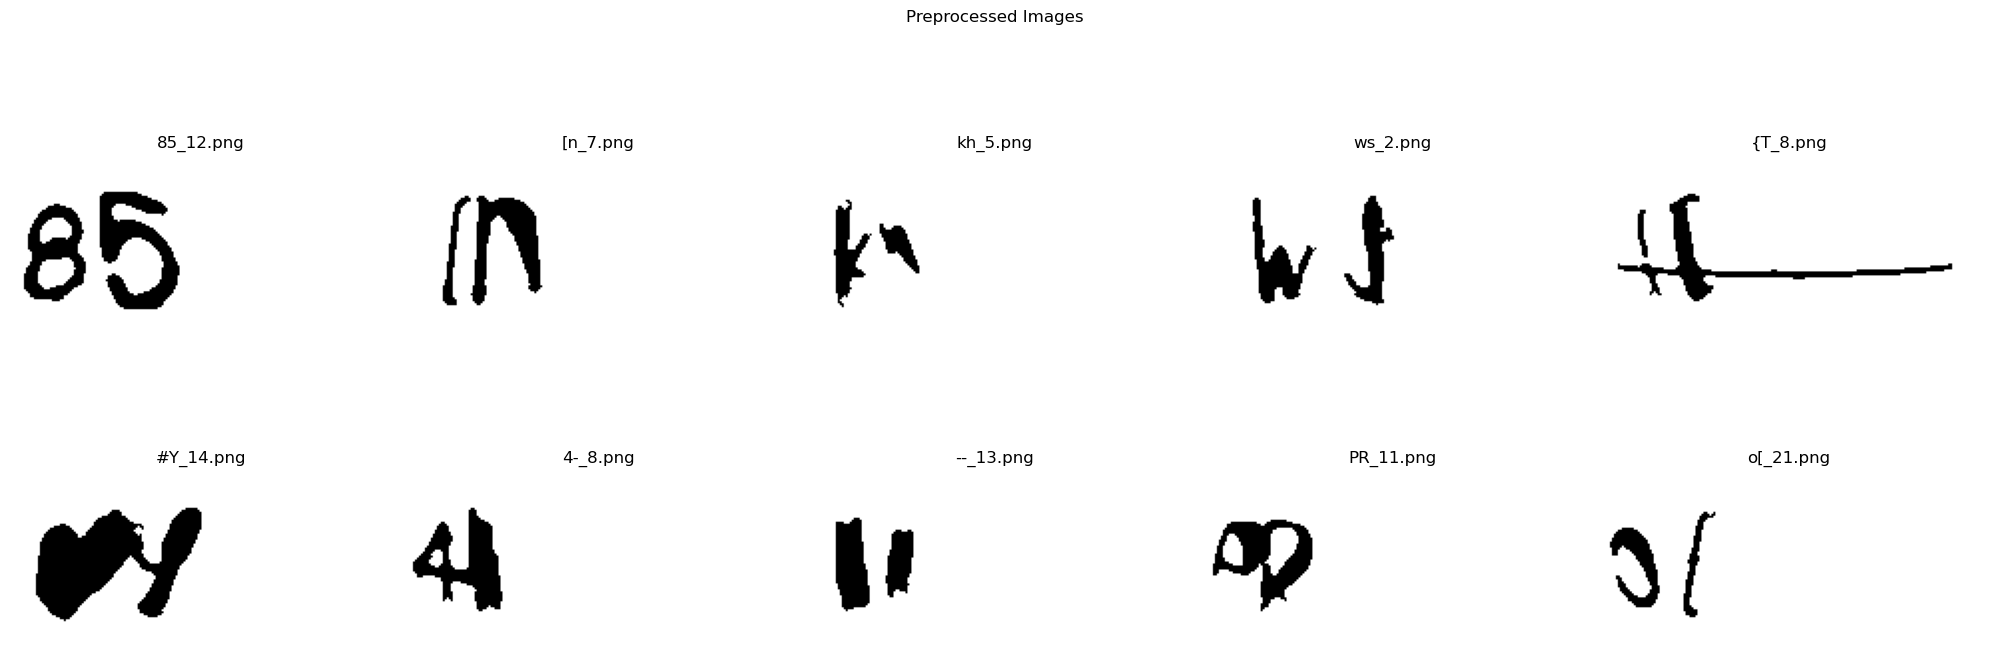

In [11]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Preprocessed Images')

for i, (file_path, image) in enumerate(images[:10]):
    processed_image = remove_noise(image)
    
    # Plot the preprocessed image
    ax = axs[i // 5, i % 5]
    ax.imshow(processed_image, cmap='gray')
    ax.set_title(os.path.basename(file_path))
    ax.axis('off')

plt.tight_layout()
plt.show()